Ejemplo de redes neuronales usando skLearn 

Queremos poder saber de que cultivador es cada vino, hay 3 cultivadores (1,2,3) y 13 caracterísitcas del vino

archivo obtenido de: https://archive.ics.uci.edu/ml/datasets/Wine  (pero ya lo tenéis bajado)

In [103]:
import pandas as pd
df = pd.read_csv('wine_shufled.data')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Cultivator,"""Alchol""","""Malic_Acid""","""Ash""","""Alcalinity_of_Ash""","""Magnesium""","""Total_phenols""","""Falvanoids""","""Nonflavanoid_phenols""","""Proanthocyanins""","""Color_intensity""","""Hue""","""OD280""","""Proline"""
0,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
1,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630
2,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600
3,3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
4,3,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855


In [104]:
# X será los atributos del vino (todas las columnas menos la primera) Y es la clase a la que pertence, 
# en este caso a que cultivador pertenece el vino (y esta información está en la columna Cultivator)
X = df.drop('Cultivator',axis=1)
y = df['Cultivator']

In [105]:
# separamos de los datos una parte para el test y otra para el training.
# Aquí lo hago con una función de sklearn, que separa 3/4 de los datos para el training y 1/4 para el test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) 


Cuando hay más de un input con distintos rangos (uno va de 0 a 1, otro de -100 a 100, etc.) es común normalizar los inputs, la manera estándar es quitar la media y dividir por la dispersión, así todos tienen media 0 y dispersión 1. 

In [106]:
# se puede hacer a mano, o aquí lo hacemos con una función de sklearn, el test se escala con los mismos valores del train.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [107]:
from sklearn.neural_network import MLPClassifier # ver help(MLPClassifier)
# definimos red neuronal con 2 capas una con 2 neuronas y otra con 10
mlp = MLPClassifier(hidden_layer_sizes=(2),activation='relu',max_iter=500) 


In [108]:
# entrenamos red
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[[13  1  0]
 [ 0 18  3]
 [ 0  1  9]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.90      0.86      0.88        21
           3       0.75      0.90      0.82        10

   micro avg       0.89      0.89      0.89        45
   macro avg       0.88      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45



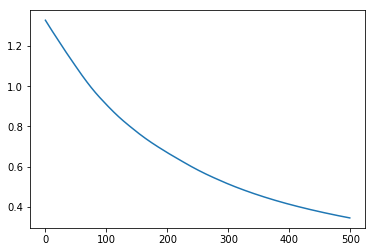

In [109]:
# vemos si ha convergido el training
import matplotlib.pyplot as pl
pl.plot(mlp.loss_curve_)
# predecimos clases del set de test
predictions=mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

No parece que haya llegado al mínimo. Podemos añadir iteraciones, más capas, más neuronas,... (lo ideal sería ir viendo lo que va haciendo con el testing, pero sklearn no lo hace automático, habría que mirarlo a mano, a cada iteración ir calculando lo que se precide para el set de validación.). 


De momento probamos otro set con una capa más, más neuronas y más iteraciones.   

In [110]:
mlp = MLPClassifier(hidden_layer_sizes=(2),activation='relu',max_iter=1000) 
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

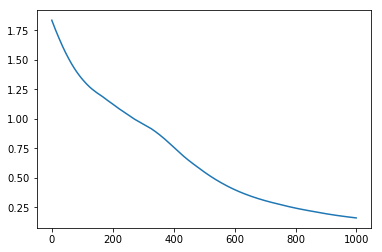

In [111]:
pl.plot(mlp.loss_curve_)
predictions=mlp.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 18  0]
 [ 0  0 10]]


In [131]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        12
          2       1.00      1.00      1.00        17
          3       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        45



Una misma configuración del MLPClassifier nos puede dar resultados ligeramente distintos porque el minimizador empieza cada vez en un estado inicial distinto. 

In [133]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')